In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Coffee_Sales_RAW_DATASET.csv")
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [3]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
df.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

## Data Cleaning & Feature Engineering

In [6]:
#Convert dates to datetime
#Extract day, month, weekday, hour

df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

df['DATE'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

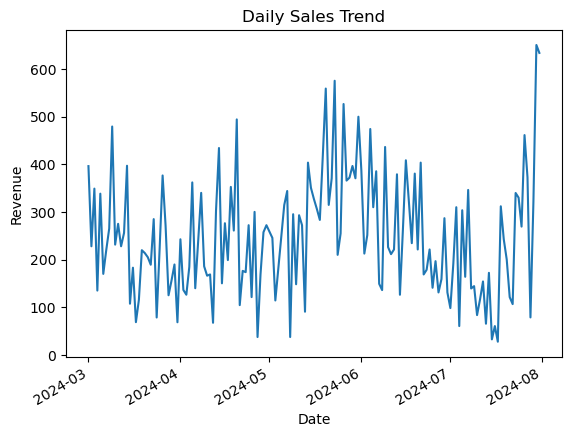

In [7]:
#Sales Trend Over Time
daily_sales = df.groupby('date')['money'].sum()
daily_sales

plt.figure()
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [8]:
#Top Selling Coffee

coffee_sales = df.groupby("coffee_name")['money'].sum().sort_values(ascending=False)
coffee_sales

coffee_name
Latte                  9009.14
Americano with Milk    8601.94
Cappuccino             7333.14
Americano              4644.54
Hot Chocolate          2778.48
Cortado                2745.08
Cocoa                  1295.94
Espresso               1100.62
Name: money, dtype: float64

## Insight: 
   Latte and Americano with Milk contribute the highest revenue and must be prioritized in inventory planning.

In [9]:
cash_only_df = df[df['cash_type'].astype(str).str.lower() == 'cash']

coffee_sales_cash = cash_only_df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
coffee_sales_cash

coffee_name
Latte                  991.0
Cappuccino             595.0
Americano with Milk    518.0
Americano              412.0
Hot Chocolate          239.0
Cocoa                  157.0
Cortado                150.0
Espresso               124.0
Name: money, dtype: float64

In [10]:
#Comaprison Between Card vs Cash Transactions

comparison_df = pd.concat(
    [coffee_sales, coffee_sales_cash],
    axis=1,
    keys=['Total Sales', 'Cash Sales']
)

comparison_df = comparison_df.fillna(0)


In [27]:
comparison_df['Card Sales'] = ( comparison_df['Total Sales'] - comparison_df['Cash Sales'] )
comparison_df

,Total Sales,Cash Sales,Card Sales
coffee_name,,,
Latte,9009.14,991.0,8018.14
Americano with Milk,8601.94,518.0,8083.94
Cappuccino,7333.14,595.0,6738.14
Americano,4644.54,412.0,4232.54
Hot Chocolate,2778.48,239.0,2539.48
Cortado,2745.08,150.0,2595.08
Cocoa,1295.94,157.0,1138.94
Espresso,1100.62,124.0,976.62


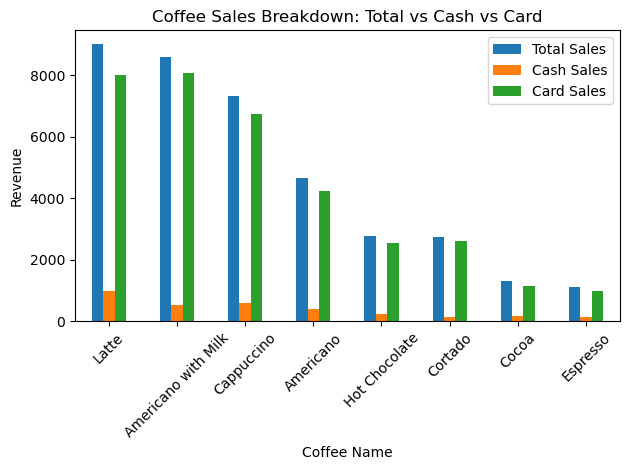

In [31]:
#Visualizing the Comparison

comparison_df[['Total Sales', 'Cash Sales', 'Card Sales']].plot(kind='bar')

plt.title("Coffee Sales Breakdown: Total vs Cash vs Card")
plt.xlabel("Coffee Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

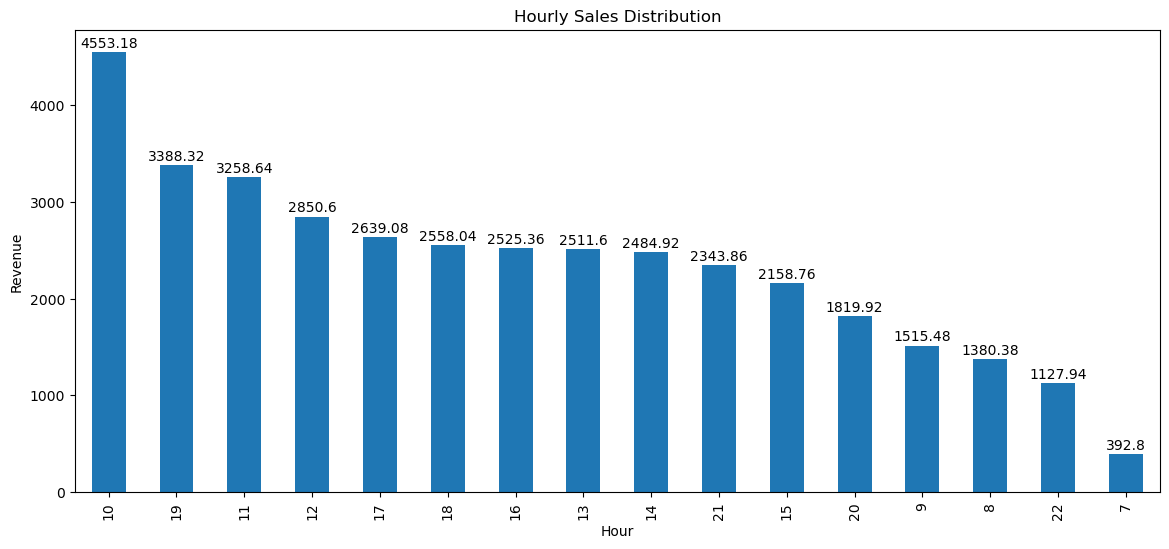

In [32]:
#Peak Sales Hours

hourly_sales = df.groupby("hour")['money'].sum().sort_values(ascending=False)
hourly_sales

plt.figure(figsize = (14, 6))
ax = hourly_sales.plot(kind='bar')

ax.bar_label(ax.containers[0], padding=1)

plt.title("Hourly Sales Distribution")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()

## Insight:
   Peak demand occurs between 10 AM–1 PM → inventory & staff optimization opportunity.

In [33]:
#Customer Purchasing Patterns
#Repeat Customers

customer_freq = df['card'].value_counts()
repeat_customers = customer_freq[customer_freq >1]
repeat_customers

card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
                       ..
ANON-0000-0000-0401     2
ANON-0000-0000-0426     2
ANON-0000-0000-0026     2
ANON-0000-0000-0028     2
ANON-0000-0000-0029     2
Name: count, Length: 165, dtype: int64

In [34]:
#Customer Preferences

customer_product = df.groupby(['card', 'coffee_name']).size().reset_index(name='count')
customer_product

,card,coffee_name,count
0,ANON-0000-0000-0001,Latte,17
1,ANON-0000-0000-0002,Hot Chocolate,2
2,ANON-0000-0000-0003,Americano,17
3,ANON-0000-0000-0003,Americano with Milk,1
4,ANON-0000-0000-0003,Cortado,4
...,...,...,...
591,ANON-0000-0000-0443,Cortado,2
592,ANON-0000-0000-0443,Latte,1
593,ANON-0000-0000-0444,Latte,1
594,ANON-0000-0000-0445,Latte,1


## Insight:
   Certain customers consistently purchase the same coffee → enables personalized recommendations.

C:\Users\GOURAB PC\AppData\Local\Temp\ipykernel_9936\2513660992.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='date')['money'].sum()


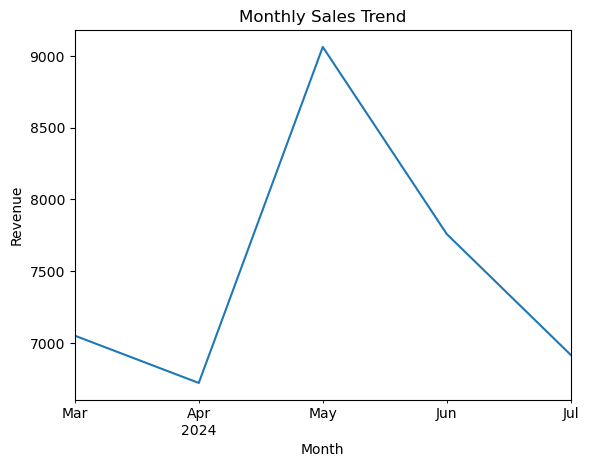

In [35]:
#Time Series Analysis
#Monthly Sales Trend
monthly_sales = df.resample('M', on='date')['money'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


## Insight:
  This indicates the seasonality,Company can run some offers & contest to make the most sales.

In [36]:
monthly_sales

date
2024-03-31    7050.20
2024-04-30    6720.56
2024-05-31    9063.42
2024-06-30    7758.76
2024-07-31    6915.94
Freq: ME, Name: money, dtype: float64

In [37]:
#Sales Forecasting
#Forecast For Next 30 Days

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_sales, order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

#The (1,1,1) order was chosen to model trend (d=1) and short-term autocorrelation in sales.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

In [38]:
#Ensure daily_sales index is datetime
daily_sales.index = pd.to_datetime(daily_sales.index)


In [39]:
#Create future date index
forecast_steps = 30

future_dates = pd.date_range(
    start=daily_sales.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)


In [40]:
#Attach dates to forecast
forecast_series = pd.Series(forecast.values, index=future_dates)


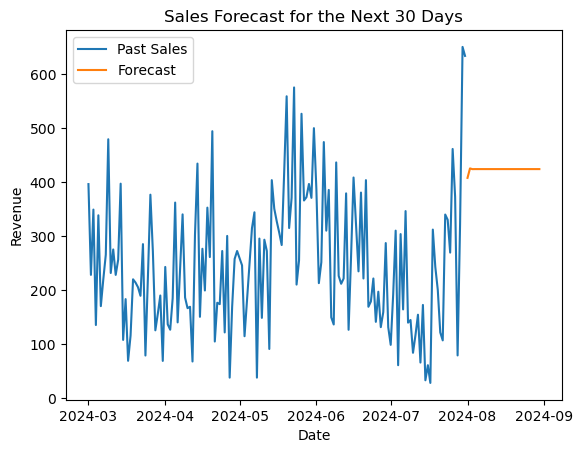

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(daily_sales, label='Past Sales')
plt.plot(forecast_series, label='Forecast')
plt.title("Sales Forecast for the Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


In [42]:
forecast_res = model_fit.get_forecast(steps=30)
conf_int = forecast_res.conf_int()

conf_int.index = future_dates
forecast_mean = forecast_res.predicted_mean
forecast_mean.index = future_dates


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


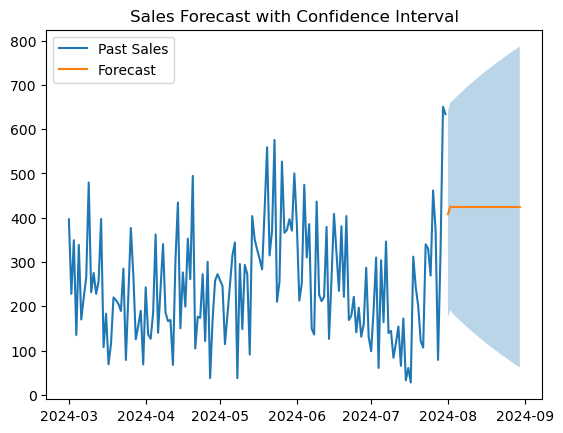

In [43]:
plt.figure()
plt.plot(daily_sales, label='Past Sales')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(
    future_dates,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    alpha=0.3
)
plt.legend()
plt.title("Sales Forecast with Confidence Interval")
plt.show()


## Key Business Insights:- 

1. A few coffee products contribute the majority of total sales, indicating clear best-sellers that should be prioritized in inventory planning.

2. Sales peak during specific hours of the day, suggesting opportunities to optimize inventory replenishment and operations around high-demand periods.

3. Card transactions show higher repeat purchase patterns, while cash sales are more associated with one-time or walk-in customers.

4. Historical sales exhibit trend and short-term patterns, making the data suitable for time-series forecasting and demand estimation.

5. Short-term sales forecasts enable proactive inventory management, helping reduce stock-outs and overstocking.

## Overall, the analysis demonstrates how exploratory data analysis and time-series forecasting can transform raw transactional data into actionable insights for sales optimization and inventory management.

In [46]:
#Save the Dataset

df.to_csv("Cleaned_Coffee_Analysis.csv", index=False)